In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Blasius Equation : 2 * f'''(n) + f(n) * f''(n) = 0
# f' = G
# G' = H
# H' = - 0.5 * f * H
# Boundary conditions: at n = 0, f(n) = 0, f'(n) = 0, at n = inf, f'(n) = 1
# f(0) = 0, G(0) = 0, H(0) = not known. Instead we know G(inf) = 1

# We handle this problem as Initial Value Problem approached by numerical methods 
# by Choosing h(0) such that it shoots to g(∞) = 1. Initial guesses may give 
# an error: 1 - g(∞) ≠ 0 . with subsequent iterations of numerical methods resolves 
# the error. This method is called shooting technique. 

# Thus we have to assume H(0) such that G(inf) = 1

In [31]:
f0 = 0
G0 = 0
dn = 0.001
n = np.arange(0, 10, 0.001)

# each row of F represents [f, f', f''] or [f, G, H]
# let's take initial value of H(0) = 1
H0 = [0.1, 1] # take two initial values to converge to the satisfactory value in between
HI = H0.copy()
G = []

In [32]:
def rk_4(F, dn):
    for i in range(len(F) - 1):
                k1 = np.array([dn * F[i, 1], dn * F[i, 2], -dn * F[i, 0] * F[i, 2] / 2])
                k2 = np.array([dn * (F[i, 1] + k1[1]/2), dn*(F[i, 2] + k1[2] / 2), -dn * (F[i, 0] + k1[0] / 2) * (F[i, 2] + k1[2] / 2) / 2])
                k3 = np.array([dn * (F[i, 1] + k2[1]/2), dn*(F[i, 2] + k2[2] / 2), -dn * (F[i, 0] + k2[0] / 2) * (F[i, 2] + k2[2] / 2) / 2])
                k4 = np.array([dn * (F[i, 1] + k3[1]/2), dn*(F[i, 2] + k3[2] / 2), -dn * (F[i, 0] + k3[0] / 2) * (F[i, 2] + k3[2] / 2) / 2])
                F[i + 1] = F[i] + (k1 + 2 * k2 + 2 * k3 + k4)/6
    return F

In [33]:
iteration = 0
error = 1
while error > 10**-3:
    if iteration == 0:
        for H in H0:
            F = np.zeros((len(n), 3))
            F[0] = [f0, G0, H]
            F = rk_4(F, dn)
            G.append(F[:, 1])
        m1, m2 = G[0][-1], G[1][-1]
    else:
        H0[1] = H0[0] + (H0[1] - H0[0]) * (1 - m1) / (m2 - m1)
        F = np.zeros((len(n), 3))
        F[0] = [f0, G0, H0[1]]
        F = rk_4(F, dn)
        error = abs(1 - F[-1][1])
        m2 = F[-1][1]
    iteration = iteration + 1
    

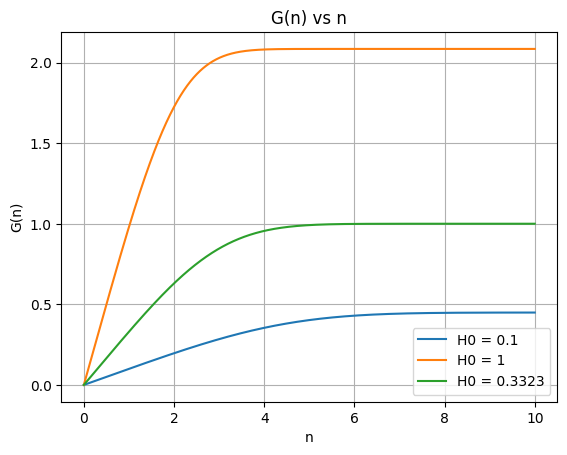

In [34]:
fig, ax = plt.subplots()
ax.plot(n, G[0], label=f'H0 = {HI[0]}')
ax.plot(n, G[1], label=f'H0 = {HI[1]}')
ax.plot(n, F[:, 1], label=f'H0 = {F[0][2]:.4f}')

ax.set_xlabel('n')  # Add an x-label to the axes.
ax.set_ylabel('G(n)')  # Add a y-label to the axes.
ax.set_title("G(n) vs n")  # Add a title to the axes.
ax.grid()
ax.legend()

In [37]:
F[-1]

array([8.28247065e+00, 1.00048618e+00, 8.37430575e-09])

In [40]:
def n_at_boundary_layer(F, n):
    for i in range(len(F)):
        if abs(F[i][1] - 1) < 10**-2:
            return n[i]

n_at_boundary_layer(F, n)

4.884